In [4]:
from optimaOutputs import OptimaMechtest
import pandas as pd
from pathlib import Path
pd.set_option('display.float_format', '{:.6e}'.format)

In [5]:
bcrn = OptimaMechtest("20250310_1k_cor.opp")

In [ ]:
# saves sigmas into a dict
sigmas_dict = {}
for _, row in bcrn.sigmas[bcrn.sigmas['!Experiment']=="stac_0001"].iterrows():
    sigmas_dict[row['Point']] = row['Scale']

In [ ]:
# calculates the distance between the measurements and normalise them with the appropriate sigma value
def sigma_range(meas, sim, sigma):
    radius = (sim-meas)/sigma
    return radius

In [ ]:
# dist block check if an xml has the simulations in the 4 sigma range or not
import numpy as np

valid_simulations = []
current_sim = 'stac_0001'
all_valid = True
valid_res_vecs = []

grouped = bcrn.mechTRes.groupby(0)

for sim_id, sim_data in grouped:
    all_valid = True
    sim_vec = []
    
    for variable in sim_data[2].unique():
        var_data = sim_data[sim_data[2] == variable]
        
        row = var_data.iloc[-1]
        
        sigma = sigmas_dict[row[2]]
        meas = row[3]
        sim_val = row[4]
        radius = sigma_range(meas, sim_val, sigma)
        
        if radius >= 4:
            all_valid = False
            break
        sim_vec.append(sim_val)
    if all_valid:
        valid_simulations.append(sim_id)
        valid_res_vecs.append(sim_vec)
         

print(f"Found {len(valid_simulations)} valid simulations")

Found 876 valid simulations


In [ ]:
# calculates the correlation matrix
import numpy as np

variable_names = list(bcrn.mechTRes[2].unique())
results_vec = np.array(valid_res_vecs)
corr_matrix = np.corrcoef(results_vec.T)

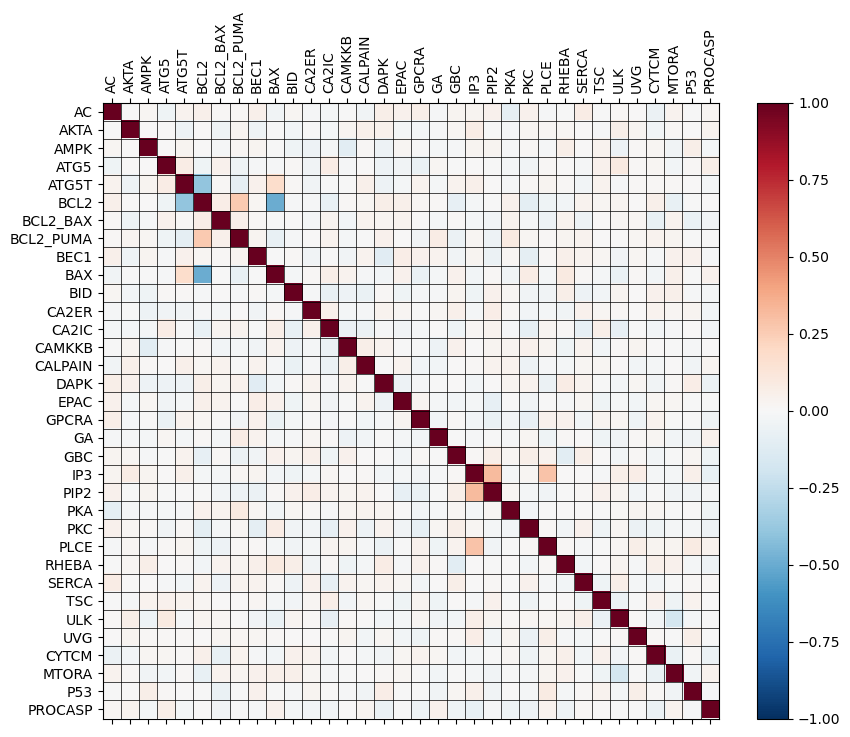

In [ ]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='RdBu_r', vmin=-1, vmax=1)
fig.colorbar(cax)

ax.set_xticks(np.arange(len(variable_names)))
ax.set_yticks(np.arange(len(variable_names)))
ax.set_xticklabels(variable_names, rotation=90)
ax.set_yticklabels(variable_names)

ax.grid(False)
for i in range(len(variable_names)):
    ax.axhline(i - 0.5, color='black', linewidth=0.5)
    ax.axvline(i - 0.5, color='black', linewidth=0.5)